# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [6]:
# TODO: Make all necessary imports.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow_datasets as tfds
import json

import matplotlib.pyplot as plt

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [7]:
# Load the dataset
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Create a training set, a validation set, and a test set
train_dataset = dataset['train']
test_dataset = dataset['test']
validation_dataset = dataset['validation'] 

## Explore the Dataset

In [8]:
# TODO: Get the number of examples in each set from the dataset info.
num_train_examples = info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = info.features['label'].num_classes
print(f'Number of classes: {num_classes}')

Number of classes: 102


In [9]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in train_dataset.take(3):
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")

Image shape: (500, 667, 3), Label: 72
Image shape: (500, 666, 3), Label: 84
Image shape: (670, 500, 3), Label: 70


Image shape: (500, 667, 3), Label: 72


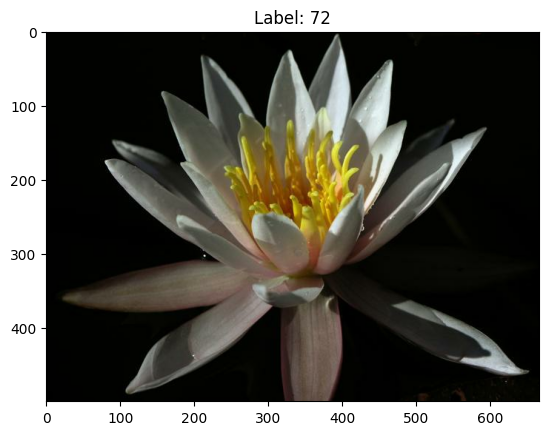

Image shape: (500, 666, 3), Label: 84


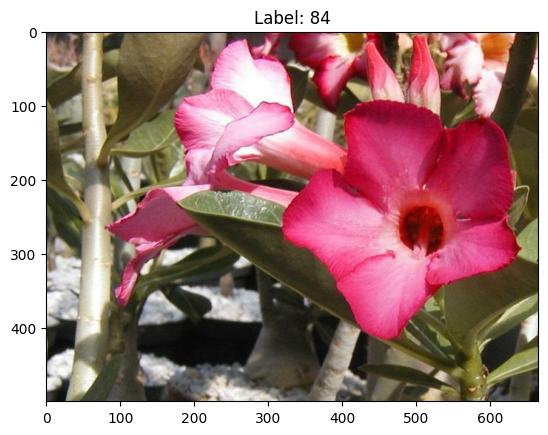

Image shape: (670, 500, 3), Label: 70


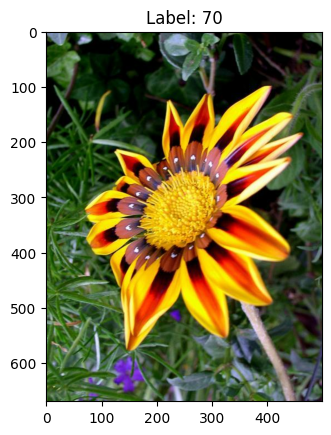

In [10]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 

for image, label in train_dataset.take(3):
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")

    # Optionally, display the image using matplotlib
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.show()


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [11]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

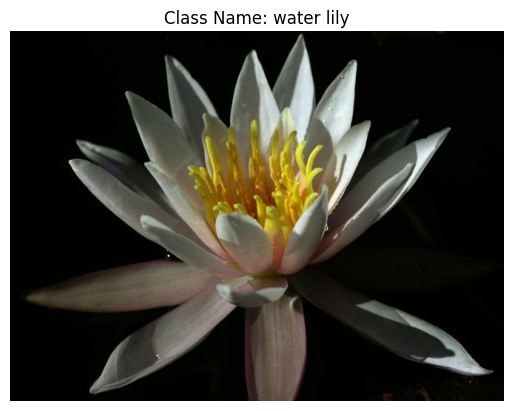

In [12]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

for image, label in train_dataset.take(1):
    # Convert the label to an integer to use as an index in class_names
    class_name = class_names[str(label.numpy())]  # Convert label to string to match json keys

    # Plot the image
    plt.imshow(image.numpy())
    plt.title(f"Class Name: {class_name}")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

## Create Pipeline

In [13]:
# TODO: Create a pipeline for each set.

# Define constants
BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Define a function to normalize the images
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.0, label

# Data augmentation function (only for training set)
def augment(image, label):
    """Applies random augmentations to the image."""
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label

# Training pipeline
train_pipeline = (train_dataset
                  .map(normalize_img, num_parallel_calls=AUTOTUNE)  # Normalize the images
                  .map(augment, num_parallel_calls=AUTOTUNE)  # Apply data augmentation
                  .shuffle(buffer_size=1000)  # Shuffle the dataset
                  .batch(BATCH_SIZE)  # Batch the dataset
                  .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

# Validation pipeline
validation_pipeline = (validation_dataset
                       .map(normalize_img, num_parallel_calls=AUTOTUNE)  # Normalize the images
                       .batch(BATCH_SIZE)  # Batch the dataset
                       .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

# Test pipeline
test_pipeline = (test_dataset
                 .map(normalize_img, num_parallel_calls=AUTOTUNE)  # Normalize the images
                 .batch(BATCH_SIZE)  # Batch the dataset
                 .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

# Print to confirm pipelines are set
print("Pipelines created for training, validation, and test sets.")


Pipelines created for training, validation, and test sets.


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [14]:
# TODO: Build and train your network.

import tensorflow_hub as hub


# Load the MobileNet feature extractor
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(mobilenet_url, input_shape=(224, 224, 3), trainable=False)

# Define the model
model = keras.Sequential([
    feature_extractor,  # MobileNet as the feature extractor
    keras.layers.Dense(1024, activation='relu'),  # Fully connected layer
    keras.layers.Dropout(0.2),  # Dropout for regularization
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               104550    
                                                                 
Total params: 3674278 (14.02 MB)
Trainable params: 1416294 (5.40 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [15]:
# Define a function to resize and normalize the images
def resize_and_normalize(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the images
    return image, label

# Modify the pipelines to include resizing
train_pipeline = (train_dataset
                  .map(resize_and_normalize, num_parallel_calls=AUTOTUNE)  # Resize and normalize the images
                  .map(augment, num_parallel_calls=AUTOTUNE)  # Apply data augmentation
                  .shuffle(buffer_size=1000)  # Shuffle the dataset
                  .batch(BATCH_SIZE)  # Batch the dataset
                  .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

validation_pipeline = (validation_dataset
                       .map(resize_and_normalize, num_parallel_calls=AUTOTUNE)  # Resize and normalize the images
                       .batch(BATCH_SIZE)  # Batch the dataset
                       .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing

test_pipeline = (test_dataset
                 .map(resize_and_normalize, num_parallel_calls=AUTOTUNE)  # Resize and normalize the images
                 .batch(BATCH_SIZE)  # Batch the dataset
                 .prefetch(buffer_size=AUTOTUNE))  # Prefetch for faster processing


In [16]:
# Set the number of epochs
EPOCHS = 10

# Train the model and capture the history
history = model.fit(train_pipeline,
                    validation_data=validation_pipeline,
                    epochs=EPOCHS)


Epoch 1/10
32/32 [==============================] - 126s 4s/step - loss: 3.8976 - accuracy: 0.1980 - val_loss: 2.3863 - val_accuracy: 0.5167
Epoch 2/10
32/32 [==============================] - 133s 4s/step - loss: 1.4833 - accuracy: 0.6422 - val_loss: 1.3235 - val_accuracy: 0.6667
Epoch 3/10
32/32 [==============================] - 134s 4s/step - loss: 0.7232 - accuracy: 0.8216 - val_loss: 1.0550 - val_accuracy: 0.7373
Epoch 4/10
32/32 [==============================] - 130s 4s/step - loss: 0.4054 - accuracy: 0.9020 - val_loss: 0.9342 - val_accuracy: 0.7363
Epoch 5/10
32/32 [==============================] - 128s 4s/step - loss: 0.2655 - accuracy: 0.9520 - val_loss: 0.9303 - val_accuracy: 0.7598
Epoch 6/10
32/32 [==============================] - 131s 4s/step - loss: 0.1726 - accuracy: 0.9686 - val_loss: 0.8154 - val_accuracy: 0.7765
Epoch 7/10
32/32 [==============================] - 133s 4s/step - loss: 0.1338 - accuracy: 0.9775 - val_loss: 0.7591 - val_accuracy: 0.7853
Epoch 8/10
32

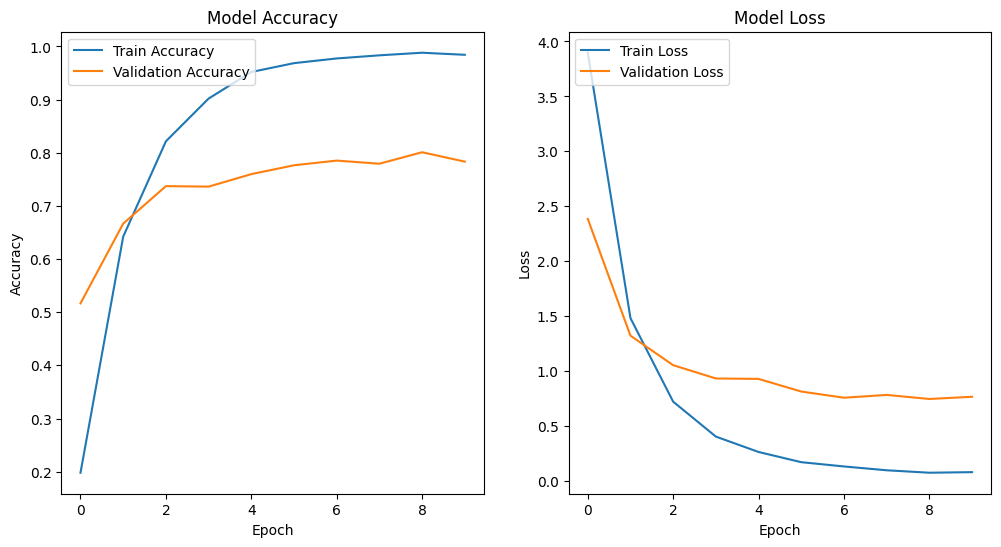

In [17]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

# Plotting the loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [18]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_pipeline)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')



193/193 [==============================] - 389s 2s/step - loss: 0.8650 - accuracy: 0.7718
Test Loss: 0.8649908304214478
Test Accuracy: 0.7718328237533569


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [19]:
# TODO: Save your trained model as a Keras model.

# Save the trained model
model.save('flower_classifier.h5')
print("Model saved as 'flower_classifier.h5'.")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as 'flower_classifier.h5'.


## Load the Keras Model

Load the Keras model you saved above.

In [20]:
# TODO: Load the Keras model

# Load the Keras model
loaded_model = keras.models.load_model('flower_classifier.h5', custom_objects={'KerasLayer': hub.KerasLayer})

# Confirm that the model was loaded successfully
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               104550    
                                                                 
Total params: 3674278 (14.02 MB)
Trainable params: 1416294 (5.40 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [21]:
# TODO: Create the process_image function

def process_image(image):
    """Process the image to be suitable for the model."""
    # Convert the image to a TensorFlow tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    
    # Resize the image to the required size (224, 224)
    image = tf.image.resize(image, (224, 224))
    
    # Normalize the image pixels to be between 0 and 1
    image /= 255.0
    
    # Convert the image back to a numpy array
    return image.numpy()


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

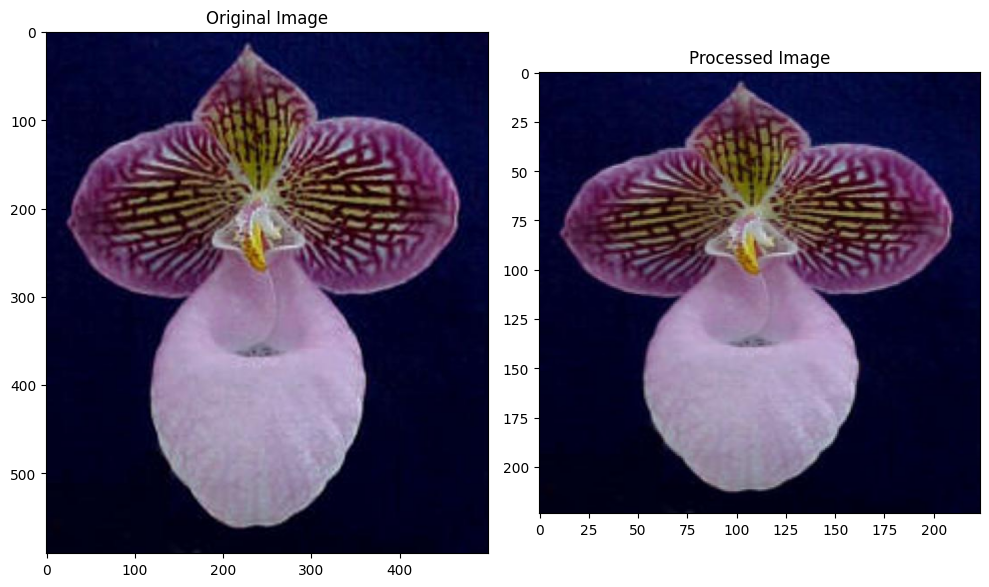

In [22]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [23]:
# TODO: Create the predict function

def predict(image_path, model, top_k=5):
    """Predict the class of an image using a trained model."""
    # Load and process the image
    im = Image.open(image_path)
    image = np.asarray(im)
    processed_image = process_image(image)
    
    # Add a batch dimension to the image
    image_batch = np.expand_dims(processed_image, axis=0)
    
    # Make predictions
    predictions = model.predict(image_batch)
    
    # Get the top K predictions
    top_k_indices = predictions[0].argsort()[-top_k:][::-1]
    top_k_probs = predictions[0][top_k_indices]
    top_k_classes = [str(index) for index in top_k_indices]
    
    return top_k_probs, top_k_classes


# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [24]:
probs, classes = predict(image_path, model, top_k=5)
print("Probabilities:", probs)
print("Classes:", classes)


1/1 [==============================] - 1s 563ms/step
Probabilities: [9.9985909e-01 3.8218153e-05 1.8356570e-05 1.1757103e-05 9.2814244e-06]
Classes: ['1', '67', '79', '6', '93']


In [25]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)


In [26]:
def plot_predictions(image_path, model, class_names, top_k=5):
    """Plot the image with the top K class predictions."""
    probs, classes = predict(image_path, model, top_k)
    
    # Convert class indices to actual class names
    class_labels = [class_names[str(c)] for c in classes]  # Convert indices to strings for dictionary keys
    
    # Plot the image
    im = Image.open(image_path)
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(im)
    ax1.axis('off')
    
    # Plot the bar chart
    ax2.barh(class_labels, probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(class_labels)))
    ax2.set_yticklabels(class_labels)
    ax2.set_title('Top 5 Predictions')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 397ms/step


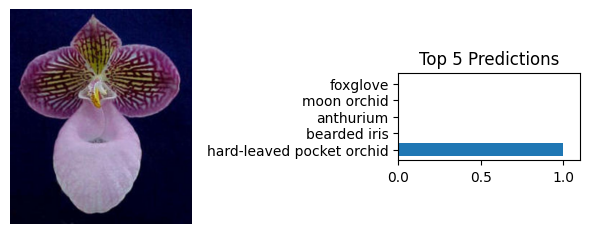

In [27]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
plot_predictions(image_path, loaded_model, class_names)
